In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

In [18]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [19]:
X_train.shape

(50000, 32, 32, 3)

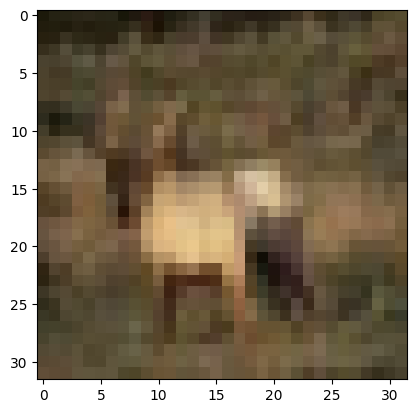

In [20]:
plt.imshow(X_train[3])

In [21]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

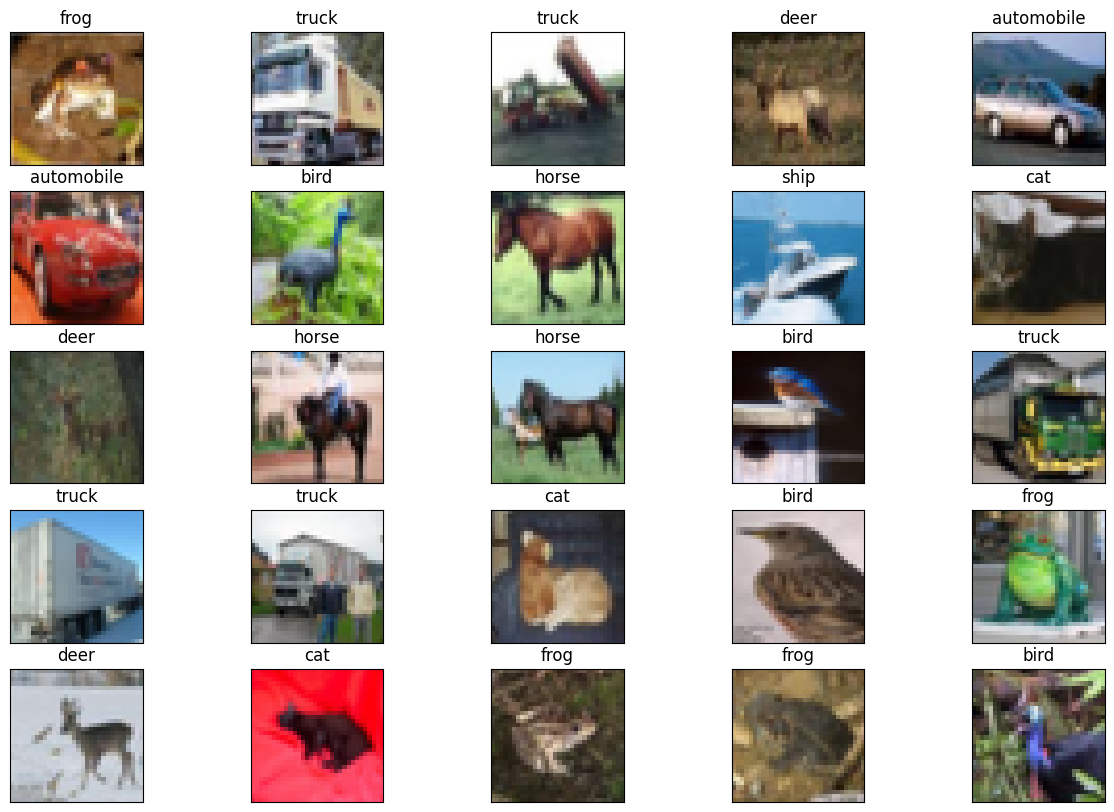

In [22]:
plt.figure(figsize=(15,10))

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(X_train[i])
  plt.title(labels[y_train[i][0]])
  plt.xticks([])
  plt.yticks([])

Scaling the data

In [23]:
X_train = X_train/255
X_test = X_test / 255

Build model

In [24]:
model = Sequential()
model.add(Conv2D(filters=32,input_shape=(32,32,3),activation='relu',kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,activation='relu',kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))


Compile the model

In [25]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Fit the model

In [26]:
history = model.fit(X_train, y_train,
                    validation_data = [X_test, y_test],
                    epochs = 10,
                    batch_size = 10,
                    verbose = 1)

Epoch 1/10
5000/5000 [==============================] - 72s 14ms/step - loss: 1.4384 - accuracy: 0.4845 - val_loss: 1.1947 - val_accuracy: 0.5738
Epoch 2/10
5000/5000 [==============================] - 71s 14ms/step - loss: 1.1166 - accuracy: 0.6070 - val_loss: 1.0684 - val_accuracy: 0.6263
Epoch 3/10
5000/5000 [==============================] - 67s 13ms/step - loss: 0.9849 - accuracy: 0.6535 - val_loss: 1.0216 - val_accuracy: 0.6466
Epoch 4/10
5000/5000 [==============================] - 69s 14ms/step - loss: 0.8833 - accuracy: 0.6898 - val_loss: 0.9995 - val_accuracy: 0.6608
Epoch 5/10
5000/5000 [==============================] - 68s 14ms/step - loss: 0.8015 - accuracy: 0.7189 - val_loss: 0.9914 - val_accuracy: 0.6622
Epoch 6/10
5000/5000 [==============================] - 69s 14ms/step - loss: 0.7238 - accuracy: 0.7451 - val_loss: 1.0128 - val_accuracy: 0.6605
Epoch 7/10
5000/5000 [==============================] - 69s 14ms/step - loss: 0.6600 - accuracy: 0.7666 - val_loss: 1.0258 -

EVALUATE THE MODEL

In [27]:
model.evaluate(X_test,y_test,batch_size=1)

10000/10000 [==============================] - 31s 3ms/step - loss: 1.2401 - accuracy: 0.6478


[1.240147590637207, 0.6478000283241272]

In [28]:
new_img=plt.imread('truck1.jpg')

In [29]:
new_img.shape

(32, 32, 3)

In [30]:
from hashlib import new
new_img=new_img/255
new_img=new_img.reshape(1,32,32,3)
labels[np.argmax(model.predict(new_img,verbose=0))]

'truck'

In [31]:
model.predict(new_img,verbose=0)

array([[2.0524478e-08, 1.1431314e-07, 2.1804647e-08, 6.7038897e-08,
        8.0301152e-09, 3.8546960e-07, 1.4917998e-08, 1.4475225e-07,
        9.8292013e-11, 9.9999917e-01]], dtype=float32)